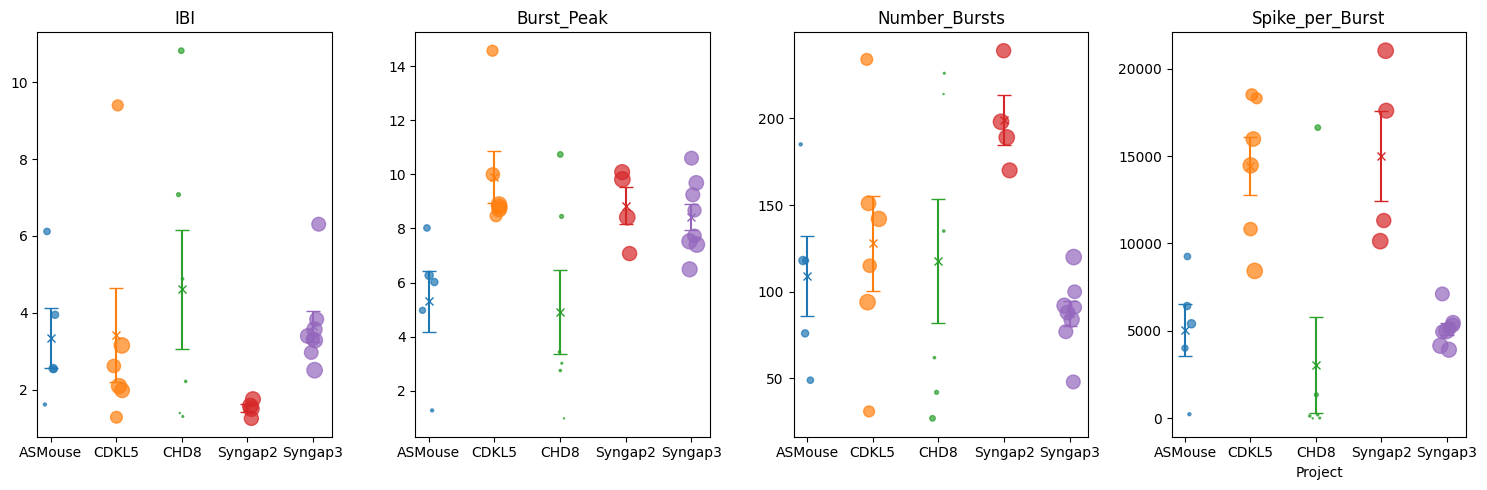

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Replace 'data.csv' with the actual filename of your dataset
data = pd.read_excel('/home/mmp/Documents/wildtype_seg/combined.xlsx')

# Group the data by the 'Project' column
grouped_data = data.groupby('Project')
print(grouped_data)
# Columns to compare
columns_to_compare = ['IBI', 'Burst_Peak', 'Number_Bursts', 'Spike_per_Burst']

# Number of subplots
num_subplots = len(columns_to_compare)

# Calculate mean and standard error for each project in each column
means = grouped_data[columns_to_compare].mean()
std_errors = grouped_data[columns_to_compare].sem()  # Standard error of the mean

# Create side-by-side bar plots with error bars
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 5))

# Iterate through each column and plot side-by-side bar plots with error bars
for i, col in enumerate(columns_to_compare):
    ax = axes[i]
    ax.set_title(col)
    for idx, (project, group) in enumerate(grouped_data):
        
        x = np.full(len(group), idx) + np.random.uniform(-0.1, 0.1, len(group))
        y = group[col]
        size = group['active electrodes']
        ax.scatter(x, y, s= size* 1.5 , alpha=0.7, label=project)
        mean_val = means.loc[project, col]
        std_err_val = std_errors.loc[project, col]
        ax.errorbar(project, mean_val, yerr=std_err_val, fmt='x', capsize=5, label=project)

# Add legend and labels
#axes[0].legend(loc='best')
plt.xlabel('Project')
plt.tight_layout()
plt.show()